In [ ]:
#ignore annoying deprecation warnings
import warnings
warnings.filterwarnings('ignore')

# Normalizing (Rescaling) Data in Python!


## Introduction

**Data normalization** (also referred to as **rescaling** or **feature scaling**) is a method that is used to standardize the range of values for the independent variables or features in a data set. Put differently, data normalization is used to ensure that each independent variable has (approximately) the same range of values.

Data sets typically contain several independent variables, and the range of values for each of those variables can vary widely. This creates a problem for many machine learning and artificial intelligence (AI) algorithms, since the objective functions used in those algorithms will not work properly without normalization. Many classifiers, for excample, calculate Euclidean distances between data points. If one of the features has a wide range of values, then the measure of Euclidean distance will be heavily influenced by that particular feature. The range of values for all independent variables should therefore be normalized in order to ensure that each variable contributes to the final distance measure in an approximately proportional manner. For machine learning and AI algorithms that rely on gradient descent, those algorithms will also usually converge must faster if the features have been normailzed in advance.

Data normalization is generally performed during the data preprocessing step within the broader data science pipeline.

## Load Libraries and Data

In this lesson, we'll be using the *Iris* data set to learn how to perform feature scaling in Python. We'll be using the `preprocessing` package from *scikit-learn* to actually normalize our data.

In [ ]:
#import libraries
import pandas as pd
from statsmodels.api import datasets
from sklearn import preprocessing

#load the iris data set, and assign it to a pandas dataframe
df = datasets.get_rdataset("iris").data

#rename the columns in the data set
df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

#view descriptive statistics for the numeric variables in the dataframe
df.describe()

As shown in the table above, the range of values (i.e., the distance between the minimum and maximum values) varies widely among the numeric variables in the data set. Let's learn a few techniques for normalizing variables such as these:

## Min-Max Normalization

**Min-max normalization** (also known as **min-max scaling**) is one of the simplest and most common feature scaling techniques. In min-max normalization, the range of values for each independent variable is rescaled to the range [0, 1] or [−1, 1], with the target range depending on the nature of the data. The general formula for min-max normalization is:

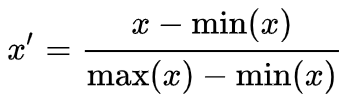

Where `min(x)` and `max(x)` are the minimum and maximum values in the data set for variable `x`, `x` is an original value and `x'` is the normalized value. The code below shows how to perform min-max normalization in Python:

In [ ]:
#define a min-max scaler object
scaler = preprocessing.MinMaxScaler() #default = [0, 1] scaler

#perform min-max normalization on all of the numeric variables
min_max_scaled = scaler.fit_transform(df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

#convert the numpy ndarray into a pandas dataframe
min_max_scaled = pd.DataFrame(min_max_scaled)

#name the columns in the new dataframe
min_max_scaled.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

#view descriptive statistics for the rescaled variables
min_max_scaled.describe()

As shown above, all of the numeric variables have been rescaled to the range `[0, 1]`.

## Z-Score Normalization

**Z-score normalization** (also known as **standard scaling**) is another very common feature scaling techniques. In z-score normalization, the values of each independent variable are rescaled into *z-scores* (also known as *standard scores*), each of which represents the (signed) number of standard deviations of the associated original value from the mean of the original distribution. The general formula for z-score normalization is:

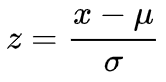

Where `x` is an original value, `μ` is the mean of the original variable, `σ` is the standard deviation of the original variable, and `z` is the normalized value. The code below shows how to perform z-score normalization in Python:

In [ ]:
#define a standard (z-score) scaler object
scaler = preprocessing.StandardScaler()

#perform z-score normalization on all of the numeric variables
z_score_scaled = scaler.fit_transform(df[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

#convert the numpy ndarray into a pandas dataframe
z_score_scaled = pd.DataFrame(z_score_scaled)

#name the columns in the new dataframe
z_score_scaled.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

#view descriptive statistics for the rescaled variables
z_score_scaled.describe()

As shown above, the mean of each rescaled numeric variable is approximately 0.0, with the standard deviation of each rescaled variable being approximately 1.0. These values are consistent with a standard normal distribution, indicating that the values of all of the numeric variables have been successfully transformed into z-scores.